In [1]:
# takes 20m-30m for 9m board results.
# create acbl and tcg result score/matchpoint dictionaries
# experiment with result dictionaries
# create some charts

# previous steps:
# acbl-board-results-cleanup.ipynb created acbl-board-results-cleaned.pkl
# TheCommonGameCommonResultsHtmlToPickle.py created ../TheCommonGame/tcg_boards_df.pkl.

# todo:
# write acbl and tcg results to sql file?
# be able to view acbl and tcg results per board result
# use acbl or tcg results. Depends on num_of_tables?
# experiment with writing df to excel file.

# Questions to answer:
# How often do players play Par contract? e.g. 60%?
# Who are the players with best ability to bid Par? Requires using actual bids.
# Who are the players with best ability to make Par?
# Who are the players that make Par or better?
# For Par contracts, what is the frequency of variance in tricks? e.g. -2, -1, 0 +1, +2
# How do players fair per round? Do some players excel in early or late rounds?

In [2]:
# requirements:
# obsolete -- conda install -c conda-forge brotli

In [3]:
import pandas as pd
from collections import defaultdict
import pathlib
import pickle
import mlBridgeLib
import matplotlib.pyplot as plt

In [4]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')
tcgPath = rootPath.joinpath('TheCommonGame')

In [6]:
# takes 15s
# read acbl results df
acbl_board_results_file = acblPath.joinpath('acbl-board-results-cleaned.pkl')
acbl_cgdf = pd.read_pickle(acbl_board_results_file)
acbl_cgdf

,Key,ClubDate,EventBoard,HandRecord,Board,Pair,NNum,NName,SNum,SName,ENum,EName,WNum,WName,PairNS,PairEW,MP_NS,MP_EW,Score,Par,MatchP,Pct,NSPair,EWPair,BidLvl,BidSuit,Dbl,NSEW,Tricks,Declarer,OnLead,Dummy,NotOnLead,EventBoardScore
8760,100222_190821E_01,100222_190821E,190821E_01,8861,01,D02_D02,9264256,"""Cook, Karen""",2961628,"""Moore, Tom(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",9264256_2961628,7396295_6497594,"[170.09, 1815.45]","[104.69, 1832.54]",-100,110,3.50,0.50,D02,D02,1,N,,N,-2,9264256,7396295,2961628,6497594,190821E_01_-100
8761,100222_190821E_02,100222_190821E,190821E_02,8861,02,D02_D02,9264256,"""Cook, Karen""",2961628,"""Moore, Tom(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",9264256_2961628,7396295_6497594,"[170.09, 1815.45]","[104.69, 1832.54]",100,-300,5.00,0.71,D02,D02,4,D,,W,-2,6497594,9264256,7396295,2961628,190821E_02_100
8762,100222_190821E_03,100222_190821E,190821E_03,8861,03,D02_D02,9264256,"""Cook, Karen""",2961628,"""Moore, Tom(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",9264256_2961628,7396295_6497594,"[170.09, 1815.45]","[104.69, 1832.54]",-100,420,1.00,0.14,D02,D02,6,D,,S,-2,2961628,6497594,9264256,7396295,190821E_03_-100
8763,100222_190821E_04,100222_190821E,190821E_04,8861,04,D06_D02,5630401,"""Long, Sam""",2670356,"""Dixon, Bob""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",5630401_2670356,7396295_6497594,"[2580.01, 443.77]","[104.69, 1832.54]",-690,140,2.00,0.29,D06,D02,3,N,,E,+3,7396295,2670356,6497594,5630401,190821E_04_-690
8764,100222_190821E_05,100222_190821E,190821E_05,8861,05,D06_D02,5630401,"""Long, Sam""",2670356,"""Dixon, Bob""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",5630401_2670356,7396295_6497594,"[2580.01, 443.77]","[104.69, 1832.54]",180,-140,3.00,0.43,D06,D02,2,N,,S,+2,2670356,6497594,5630401,7396295,190821E_05_180
8765,100222_190821E_06,100222_190821E,190821E_06,8861,06,D06_D02,5630401,"""Long, Sam""",2670356,"""Dixon, Bob""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",5630401_2670356,7396295_6497594,"[2580.01, 443.77]","[104.69, 1832.54]",460,-110,6.50,0.93,D06,D02,3,N,,N,+2,5630401,7396295,2670356,6497594,190821E_06_460
8766,100222_190821E_19,100222_190821E,190821E_19,8861,19,D05_D02,4458079,"""Hacker, Rosalee""",4632036,"""Burke, Charles(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",4458079_4632036,7396295_6497594,"[1336.91, 1957.22]","[104.69, 1832.54]",-50,140,5.50,0.79,D05,D02,4,D,,N,-1,4458079,7396295,4632036,6497594,190821E_19_-50
8767,100222_190821E_20,100222_190821E,190821E_20,8861,20,D05_D02,4458079,"""Hacker, Rosalee""",4632036,"""Burke, Charles(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",4458079_4632036,7396295_6497594,"[1336.91, 1957.22]","[104.69, 1832.54]",200,-620,4.00,0.57,D05,D02,2,C,,E,-2,7396295,4632036,6497594,4458079,190821E_20_200
8768,100222_190821E_21,100222_190821E,190821E_21,8861,21,D05_D02,4458079,"""Hacker, Rosalee""",4632036,"""Burke, Charles(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",4458079_4632036,7396295_6497594,"[1336.91, 1957.22]","[104.69, 1832.54]",-170,-1400,4.00,0.57,D05,D02,3,H,,W,+1,6497594,4458079,7396295,4632036,190821E_21_-170
8769,100222_190821E_07,100222_190821E,190821E_07,8861,07,D03_D02,2620499,"""Walker, Mildred""",5378710,"""Gilbreath, Sue(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",2620499_5378710,7396295_6497594,"[179.0, 1825.03]","[104.69, 1832.54]",-200,-140,4.50,0.64,D03,D02,3,S,,E,+2,7396295,5378710,6497594,2620499,190821E_07_-200


In [7]:
acbl_player_name_dict = acblPath.joinpath('acbl_player_name_dict.pkl')
with open(acbl_player_name_dict,'rb') as f:
    acbl_playerd = pickle.load(f)

In [8]:
acbl_playerd['2663279']

'Salita, Robert'

<AxesSubplot:>

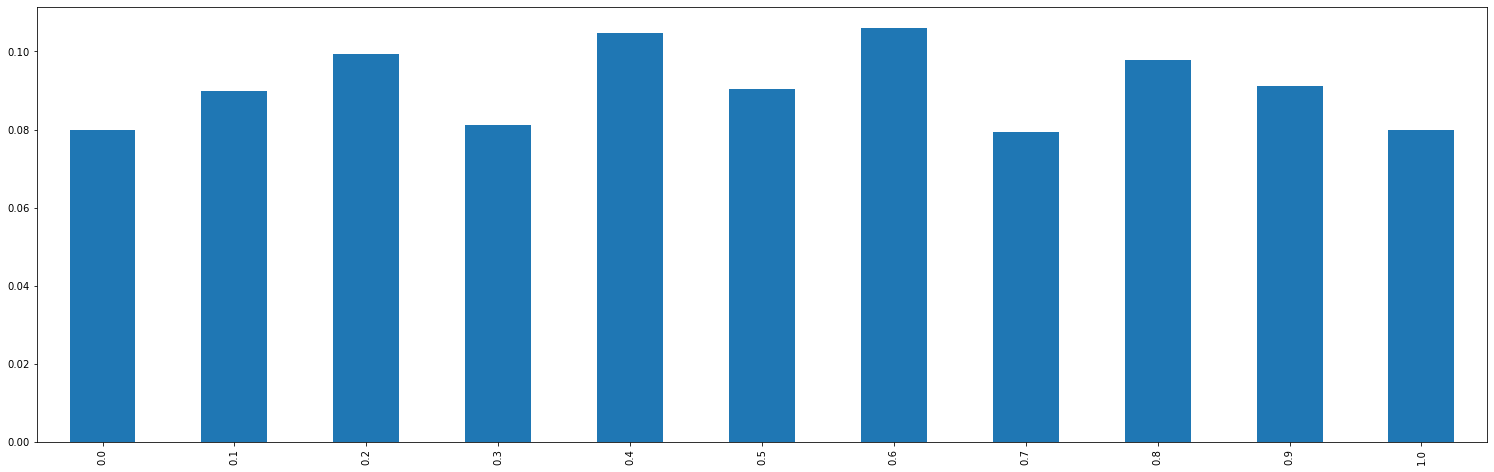

In [9]:
# takes 1s
# warning: Need to do astype('float') before round() otherwise round() will have no effect.
acbl_cgdf['Pct'].astype('float').round(1).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(26,8))

In [10]:
# takes 1m40s
# todo: move 'Declarer_Pct' to acbl-board-results-cleanup?
# Create 'Declarer_Pct' for 'Pct' relative to declarer's direction; 'Pct' for NS or 1-'Pct' for EW. Essentially make all NS.
acbl_cgdf['Declarer_Pct'] = acbl_cgdf[['Pct','NSEW']].apply(lambda r: r['Pct'] if r['NSEW'] in 'NS' else 1-r['Pct'],axis='columns')
acbl_cgdf[['Pct','Declarer_Pct','NSEW']]

,Pct,Declarer_Pct,NSEW
8760,0.50,0.50,N
8761,0.71,0.29,W
8762,0.14,0.14,S
8763,0.29,0.71,E
8764,0.43,0.43,S
8765,0.93,0.93,N
8766,0.79,0.79,N
8767,0.57,0.43,E
8768,0.57,0.43,W
8769,0.64,0.36,E


In [11]:
# takes 3m
# todo: move 'Declarer_Score' to acbl-board-results-cleanup?
# Create 'Declarer_Score' for 'Score' relative to declarer's direction; 'Score' for NS or -'Score' for EW. Essentially make all NS.
acbl_cgdf['Declarer_Score'] = acbl_cgdf[['Score','NSEW']].apply(lambda r: r['Score'] if not r['Score'][r['Score'][0] == '-':].isnumeric() or r['NSEW'] in 'NS' else str(-int(r['Score'])),axis='columns')
acbl_cgdf[['NSEW','Pct','Declarer_Pct','Score','Declarer_Score']]

,NSEW,Pct,Declarer_Pct,Score,Declarer_Score
8760,N,0.50,0.50,-100,-100
8761,W,0.71,0.29,100,-100
8762,S,0.14,0.14,-100,-100
8763,E,0.29,0.71,-690,690
8764,S,0.43,0.43,180,180
8765,N,0.93,0.93,460,460
8766,N,0.79,0.79,-50,-50
8767,E,0.57,0.43,200,-200
8768,W,0.57,0.43,-170,170
8769,E,0.64,0.36,-200,200


In [12]:
# takes 1m40s
# todo: move 'Declarer_Pct' to acbl-board-results-cleanup?
# Create 'Declarer_Pct' for 'Pct' relative to declarer's direction; 'Pct' for NS or 1-'Pct' for EW. Essentially make all NS.
acbl_cgdf['Declarer_Par'] = acbl_cgdf[['Par','NSEW']].apply(lambda r: r['Par'] if r['NSEW'] in 'NS' else -r['Par'],axis='columns')
acbl_cgdf[['Par','Declarer_Par','NSEW']]

,Par,Declarer_Par,NSEW
8760,110,110,N
8761,-300,300,W
8762,420,420,S
8763,140,-140,E
8764,-140,-140,S
8765,-110,-110,N
8766,140,140,N
8767,-620,620,E
8768,-1400,1400,W
8769,-140,140,E


In [13]:
# takes 5m
# todo: move 'Declarer_Pct' to acbl-board-results-cleanup?
# Create 'Declarer_Pct' for 'Pct' relative to declarer's direction; 'Pct' for NS or 1-'Pct' for EW. Essentially make all NS.
def DeclarerDirectionToMP(r):
    # todo: make this a one liner.
    if r['NSEW']=='N':
        return r['MP_NS'][0]
    elif r['NSEW']=='S':
        return r['MP_NS'][1]
    elif r['NSEW']=='E':
        return r['MP_EW'][0]
    elif r['NSEW']=='W':
        return r['MP_EW'][1]
    else:
        assert False
def DummyDirectionToMP(r):
    # todo: make this a one liner.
    if r['NSEW']=='N':
        return r['MP_NS'][1]
    elif r['NSEW']=='S':
        return r['MP_NS'][0]
    elif r['NSEW']=='E':
        return r['MP_EW'][1]
    elif r['NSEW']=='W':
        return r['MP_EW'][0]
    else:
        assert False
acbl_cgdf['Declarer_MP'] = acbl_cgdf[['MP_NS','MP_EW','NSEW']].apply(lambda r: DeclarerDirectionToMP(r),axis='columns')
acbl_cgdf['Dummy_MP'] = acbl_cgdf[['MP_NS','MP_EW','NSEW']].apply(lambda r: DummyDirectionToMP(r),axis='columns')
acbl_cgdf['Geometric_MP'] = acbl_cgdf['Declarer_MP']*acbl_cgdf['Dummy_MP']
acbl_cgdf[['Declarer_MP','Dummy_MP','Geometric_MP','MP_NS','MP_EW','NSEW']]

,Declarer_MP,Dummy_MP,Geometric_MP,MP_NS,MP_EW,NSEW
8760,170.09,1815.45,308789.89,"[170.09, 1815.45]","[104.69, 1832.54]",N
8761,1832.54,104.69,191848.61,"[170.09, 1815.45]","[104.69, 1832.54]",W
8762,1815.45,170.09,308789.89,"[170.09, 1815.45]","[104.69, 1832.54]",S
8763,104.69,1832.54,191848.61,"[2580.01, 443.77]","[104.69, 1832.54]",E
8764,443.77,2580.01,1144931.04,"[2580.01, 443.77]","[104.69, 1832.54]",S
8765,2580.01,443.77,1144931.04,"[2580.01, 443.77]","[104.69, 1832.54]",N
8766,1336.91,1957.22,2616626.99,"[1336.91, 1957.22]","[104.69, 1832.54]",N
8767,104.69,1832.54,191848.61,"[1336.91, 1957.22]","[104.69, 1832.54]",E
8768,1832.54,104.69,191848.61,"[1336.91, 1957.22]","[104.69, 1832.54]",W
8769,104.69,1832.54,191848.61,"[179.0, 1825.03]","[104.69, 1832.54]",E


In [14]:
# takes 15s
# Extract 'Club' from 'ClubDate'.
acbl_cgdf['Club'] = acbl_cgdf['ClubDate'].str.split('_').str[0]
acbl_cgdf[['ClubDate','Club']]

,ClubDate,Club
8760,100222_190821E,100222
8761,100222_190821E,100222
8762,100222_190821E,100222
8763,100222_190821E,100222
8764,100222_190821E,100222
8765,100222_190821E,100222
8766,100222_190821E,100222
8767,100222_190821E,100222
8768,100222_190821E,100222
8769,100222_190821E,100222


In [15]:
# want this? acbl_cgdf['Par_Beats_PctAvg'] = acbl_cgdf['Par_Beats']*acbl_cgdf['Declarer_PctAvg']

In [16]:
# takes 50s
# all done with augmentations. write out file.
acbl_board_results_augmented_file = acblPath.joinpath('acbl-board-results-augmented.pkl')
with open(acbl_board_results_augmented_file,'wb') as f:
    pickle.dump(acbl_cgdf,f)

In [17]:
# takes 1s
g = acbl_cgdf[['Club','Declarer','Pct','Declarer_Pct','NSEW','Score','Declarer_Score','Declarer_Par','Declarer_MP','Dummy_MP','Geometric_MP']].groupby('Declarer')
g

In [18]:
players = ['1709925','2195097','2454602','2663279','2342200','8016437','8071683']
clubs = ['108571']
for p in players:
    pdf = acbl_cgdf.loc[g.groups[p]]
    pdf = pdf[pdf['Club'].isin(clubs)]
    df = pd.DataFrame({'Name':acbl_playerd[p],'NSEW':d,'count':pdf[pdf['NSEW'] == d]['Declarer_Pct'].count(),'mean':pdf[pdf['NSEW'] == d]['Declarer_Pct'].mean(),'par':pdf[pdf['NSEW'] == d]['Declarer_Par'].mean()} for d in 'NSEW')
    display(df)

,Name,NSEW,count,mean,par
0,"Silverman, Neil",N,165,0.59,29.52
1,"Silverman, Neil",S,46,0.62,51.74
2,"Silverman, Neil",E,574,0.62,-17.87
3,"Silverman, Neil",W,212,0.61,23.02


,Name,NSEW,count,mean,par
0,"De Young, Bernace",N,90,0.54,-4.33
1,"De Young, Bernace",S,13,0.51,399.23
2,"De Young, Bernace",E,0,NaN,NaN
3,"De Young, Bernace",W,0,NaN,NaN


,Name,NSEW,count,mean,par
0,"Flom, Kerry",N,0,NaN,NaN
1,"Flom, Kerry",S,0,NaN,NaN
2,"Flom, Kerry",E,0,NaN,NaN
3,"Flom, Kerry",W,0,NaN,NaN


,Name,NSEW,count,mean,par
0,"Salita, Robert",N,62,0.54,-53.71
1,"Salita, Robert",S,21,0.65,20.95
2,"Salita, Robert",E,226,0.50,-53.27
3,"Salita, Robert",W,43,0.50,20.47


,Name,NSEW,count,mean,par
0,"Jones, Jack",N,374,0.61,65.05
1,"Jones, Jack",S,451,0.63,62.08
2,"Jones, Jack",E,7,0.54,102.86
3,"Jones, Jack",W,0,NaN,NaN


,Name,NSEW,count,mean,par
0,"Boden, Rosemary",N,46,0.55,34.78
1,"Boden, Rosemary",S,260,0.51,13.62
2,"Boden, Rosemary",E,42,0.61,23.33
3,"Boden, Rosemary",W,324,0.55,-4.20


,Name,NSEW,count,mean,par
0,"Ganness, Sean",N,11,0.78,-26.36
1,"Ganness, Sean",S,151,0.57,-22.85
2,"Ganness, Sean",E,231,0.67,-4.07
3,"Ganness, Sean",W,180,0.51,-106.94


In [19]:
def player_stats(dpct,rolling_window_size):
    w = [p/len(dpct) for p in range(1,len(dpct)+1)]
    moving_average = sum(w*dpct)/sum(w) if w else dpct.mean()
    return (round(moving_average,2),round(dpct.mean(),2),dpct.count(),round(dpct.std(),2))

# takes 2m with clubs filter or 2m30s with no filter
clubs = ['108571'] # list of clubs to allow. Empty list means all clubs.
players = [] #['2663279'] # list of players to allow. Empty list means all players.
minimum_declares = 30
rolling_window_size = 0 #6*20+1 # rolling windows size (SMA?). player is declarer 6 times per event * last 20 events
cols = ['Declarer','Declarer_Pct','NSEW']
mini_acbl_cgdf = acbl_cgdf[(len(clubs) == 0) | acbl_cgdf['Club'].isin(clubs)][cols]
if players:
    mini_acbl_cgdf = mini_acbl_cgdf[acbl_cgdf['Declarer'].isin(players)]
player_numbers = []
player_names = []
stats = defaultdict(list)
stats_header = '_'.join(['','MA','Mean','Count','Std'])
large_enough_declarer_groups = [(p,pdf) for p,pdf in mini_acbl_cgdf.groupby('Declarer') if len(pdf) >= minimum_declares]
for p,pdf in large_enough_declarer_groups:
    player_numbers.append(p)
    player_names.append(acbl_playerd[p])
    dpct = pdf['Declarer_Pct']
    stats['all'+stats_header].append(player_stats(dpct,rolling_window_size))
    for d in 'NSEW':
        dpct = pdf[pdf['NSEW'] == d]['Declarer_Pct']
        stats[d+stats_header].append(player_stats(dpct,rolling_window_size))
df = pd.DataFrame({'player':player_numbers,'name':player_names, **stats})
df

,player,name,all_MA_Mean_Count_Std,N_MA_Mean_Count_Std,S_MA_Mean_Count_Std,E_MA_Mean_Count_Std,W_MA_Mean_Count_Std
0,1023535,"Gottesfeld, G","(0.57, 0.57, 138, 0.26)","(0.57, 0.57, 133, 0.27)","(nan, nan, 0, nan)","(nan, nan, 0, nan)","(0.43, 0.5, 5, 0.18)"
1,1042750,"Gross, Richard","(0.54, 0.54, 204, 0.27)","(0.59, 0.62, 16, 0.26)","(nan, nan, 0, nan)","(0.53, 0.54, 185, 0.27)","(0.51, 0.51, 3, 0.12)"
2,1063006,"Romboli, Bruce","(0.56, 0.56, 146, 0.31)","(0.58, 0.55, 24, 0.32)","(nan, nan, 0, nan)","(0.55, 0.56, 88, 0.31)","(0.54, 0.57, 34, 0.28)"
3,1068032,"Bachand, Robert","(0.56, 0.54, 54, 0.25)","(nan, nan, 0, nan)","(nan, nan, 0, nan)","(0.54, 0.52, 29, 0.25)","(0.59, 0.56, 25, 0.26)"
4,1086634,"Greenberg, Hazel","(0.47, 0.49, 129, 0.31)","(0.48, 0.5, 64, 0.3)","(nan, nan, 0, nan)","(0.44, 0.47, 65, 0.32)","(nan, nan, 0, nan)"
5,1127675,"Bronstein, Peter","(0.56, 0.56, 290, 0.29)","(0.45, 0.45, 34, 0.31)","(0.64, 0.61, 57, 0.27)","(0.56, 0.56, 151, 0.3)","(0.63, 0.62, 48, 0.28)"
6,1134310,"Lafond, Roxane","(0.52, 0.49, 158, 0.32)","(0.49, 0.46, 128, 0.31)","(0.64, 0.64, 25, 0.29)","(0.53, 0.65, 5, 0.42)","(nan, nan, 0, nan)"
7,1141104,"Petrey, Carolee","(0.53, 0.53, 447, 0.3)","(0.53, 0.54, 434, 0.3)","(0.4, 0.5, 9, 0.37)","(0.36, 0.5, 4, 0.41)","(nan, nan, 0, nan)"
8,1150286,"Kondor, Uri","(0.49, 0.54, 39, 0.29)","(0.55, 0.51, 9, 0.31)","(nan, nan, 0, nan)","(0.47, 0.55, 30, 0.3)","(nan, nan, 0, nan)"
9,1150294,"Kondor, Tova","(0.51, 0.51, 69, 0.32)","(0.47, 0.51, 25, 0.31)","(0.66, 0.63, 7, 0.2)","(0.56, 0.58, 18, 0.34)","(0.28, 0.38, 19, 0.33)"


In [20]:
# todo: experiment with writing df to excel file.

In [21]:
df.sort_values('all_MA_Mean_Count_Std',ascending=False)

,player,name,all_MA_Mean_Count_Std,N_MA_Mean_Count_Std,S_MA_Mean_Count_Std,E_MA_Mean_Count_Std,W_MA_Mean_Count_Std
405,6941508,"Lynch, Michael","(0.69, 0.64, 77, 0.3)","(nan, nan, 0, nan)","(nan, nan, 0, nan)","(0.66, 0.67, 33, 0.3)","(0.69, 0.63, 44, 0.3)"
26,1313568,"Sinukoff, Evelyn","(0.69, 0.64, 39, 0.27)","(0.66, 0.61, 31, 0.28)","(nan, nan, 0, nan)","(0.72, 0.73, 8, 0.24)","(nan, nan, 0, nan)"
213,3927385,"Jensen, Jack","(0.66, 0.64, 133, 0.3)","(0.68, 0.65, 93, 0.3)","(0.58, 0.6, 22, 0.31)","(0.66, 0.6, 14, 0.28)","(0.67, 0.59, 4, 0.27)"
157,3112012,"Bourbeau, Christine","(0.66, 0.62, 34, 0.28)","(0.71, 0.65, 21, 0.29)","(nan, nan, 0, nan)","(0.58, 0.58, 13, 0.26)","(nan, nan, 0, nan)"
473,7968582,"Ledford, Jody","(0.65, 0.61, 33, 0.24)","(0.43, 0.43, 1, nan)","(0.68, 0.69, 7, 0.22)","(nan, nan, 0, nan)","(0.63, 0.59, 25, 0.24)"
385,6715095,"Labelle, Barbara","(0.64, 0.64, 167, 0.27)","(0.65, 0.65, 30, 0.28)","(0.53, 0.53, 16, 0.27)","(0.61, 0.63, 101, 0.27)","(0.79, 0.74, 20, 0.26)"
421,7262841,"Howrey, Jim","(0.64, 0.63, 39, 0.26)","(nan, nan, 0, nan)","(0.62, 0.6, 25, 0.26)","(0.79, 0.8, 2, 0.03)","(0.63, 0.67, 12, 0.28)"
170,3281671,"Clifford, Carol","(0.64, 0.62, 60, 0.27)","(0.58, 0.64, 15, 0.2)","(nan, nan, 0, nan)","(0.68, 0.64, 36, 0.29)","(0.52, 0.54, 9, 0.29)"
226,4036956,"Shenkin, Barnet","(0.63, 0.61, 363, 0.28)","(0.69, 0.65, 24, 0.3)","(0.7, 0.67, 45, 0.23)","(0.59, 0.57, 73, 0.28)","(0.61, 0.61, 221, 0.28)"
98,2216809,"Epstein, Linda","(0.63, 0.61, 85, 0.26)","(0.41, 0.42, 3, 0.14)","(0.64, 0.62, 71, 0.26)","(0.6, 0.59, 11, 0.23)","(nan, nan, 0, nan)"


In [22]:
players = ['1709925','2195097','2454602','2663279','2342200','8016437','8071683']
df[df['player'].isin(players)]

,player,name,all_MA_Mean_Count_Std,N_MA_Mean_Count_Std,S_MA_Mean_Count_Std,E_MA_Mean_Count_Std,W_MA_Mean_Count_Std
59,1709925,"Silverman, Neil","(0.61, 0.61, 997, 0.29)","(0.61, 0.59, 165, 0.3)","(0.63, 0.62, 46, 0.26)","(0.61, 0.62, 574, 0.29)","(0.59, 0.61, 212, 0.29)"
95,2195097,"De Young, Bernace","(0.52, 0.54, 103, 0.27)","(0.52, 0.54, 90, 0.27)","(0.47, 0.51, 13, 0.31)","(nan, nan, 0, nan)","(nan, nan, 0, nan)"
107,2342200,"Jones, Jack","(0.62, 0.62, 832, 0.28)","(0.61, 0.61, 374, 0.28)","(0.63, 0.63, 451, 0.28)","(0.38, 0.54, 7, 0.41)","(nan, nan, 0, nan)"
131,2663279,"Salita, Robert","(0.52, 0.52, 352, 0.31)","(0.55, 0.54, 62, 0.27)","(0.7, 0.65, 21, 0.32)","(0.5, 0.5, 226, 0.31)","(0.51, 0.5, 43, 0.33)"
475,8016437,"Boden, Rosemary","(0.54, 0.54, 672, 0.29)","(0.56, 0.55, 46, 0.3)","(0.53, 0.51, 260, 0.29)","(0.59, 0.61, 42, 0.26)","(0.55, 0.55, 324, 0.3)"
481,8071683,"Ganness, Sean","(0.6, 0.6, 573, 0.32)","(0.76, 0.78, 11, 0.18)","(0.59, 0.57, 151, 0.32)","(0.68, 0.67, 231, 0.3)","(0.5, 0.51, 180, 0.33)"


<AxesSubplot:title={'center':'Mean of MP Percentage'}, ylabel='Player Name'>

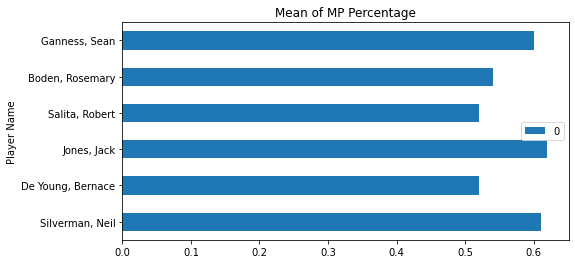

In [23]:
b = df['player'].isin(players)
pd.DataFrame([stats[0] for stats in df['all_MA_Mean_Count_Std'][b]],index=df['name'][b]).plot(kind='barh', xlabel='Player Name', title='Mean of MP Percentage', figsize=(8,4))

In [24]:
# handy label, title dictionary
declarer_history_d = {'xlabel':'Earlier <-----> Later', 'ylabel':'MP Percentage Result', 'title':'Declarer Results History'}

In [25]:
# takes 3m
import numpy as np
mini_acbl_cgdf = acbl_cgdf[['Declarer','Declarer_Pct']].groupby('Declarer')
filtered_mini_acbl_cgdf = [(p,pdf) for p,pdf in mini_acbl_cgdf if len(pdf) >= minimum_declares]
slope_x_p = {}
for player,pdf in filtered_mini_acbl_cgdf:
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts.values
    #z = np.polyfit(xvalues, yvalues, 1) # z[0] is slope
    #p = np.poly1d(z)
    w = [p/len(yvalues) for p in range(1,len(yvalues)+1)]
    moving_average = [sum(w[:n]*yvalues[:n])/sum(w[:n]) for n in range(1,len(yvalues)+1)]
    z = np.polyfit(xvalues, moving_average, 1) # z[0] is slope
    p = np.poly1d(z)
    slope_x_p[player] = (z[0], xvalues, p)
slopedf = pd.DataFrame([(player,slope[0]) for player,slope in slope_x_p.items()],columns=['Player','Slope'])
slopedf

,Player,Slope
0,#1402,-0.31
1,1000365,-0.02
2,1000489,-0.09
3,1000543,-0.02
4,1000810,-0.40
5,1000837,-0.14
6,1000969,0.27
7,1001175,-0.23
8,1001426,-0.26
9,1001477,-0.06


In [26]:
slopedf['abs_Slope'] = abs(slopedf['Slope'])
slopedf['Name'] = slopedf['Player'].map(lambda x: acbl_playerd[x])
slopedf['Declarer_Count'] = slopedf['Player'].map(lambda x: len(mini_acbl_cgdf.get_group(x)))
playersdf = slopedf[slopedf['Declarer_Count'] > 200].nlargest(50,'abs_Slope').sort_values('abs_Slope',ascending=False)
playersdf

,Player,Slope,abs_Slope,Name,Declarer_Count
47602,7897723,0.30,0.30,"Libchaber, David",261
32913,5738873,-0.30,0.30,"Mahood, Marcia",220
408,1083600,0.29,0.29,"Sullivan, Sandi",242
32307,5650968,0.28,0.28,"Swan, Janice",214
34174,5917123,-0.27,0.27,"Jacobs, Harris",367
48541,8073619,0.27,0.27,"Darnley, Doug",201
7949,2164272,-0.27,0.27,"Alexandro, Frank",205
23916,4503961,0.26,0.26,"DiCostanzo, Geri",224
669,1135619,0.24,0.24,"Zenk, Stephen",206
27805,5114578,0.24,0.24,"Wells, Gail",203


In [27]:
slopedf[slopedf['Name'].str.contains('Neiman')].sort_values('Name')

,Player,Slope,abs_Slope,Name,Declarer_Count
45227,7607342,-0.01,0.01,"Neiman, David",80
32473,5677696,0.05,0.05,"Neiman, Deborah",111
1433,1255819,-0.06,0.06,"Neiman, H Frank",40
11784,2690942,-0.09,0.09,"Neiman, Nancy",460
49333,8203865,-0.00,0.00,"Neimand, Jon",114


In [28]:
players = ['1697013','1709925','2663279','8016437','2195097','2454602','2663279','2342200','8016437','8071683']
slopedf[slopedf['Player'].isin(players)].sort_values('Name')

,Player,Slope,abs_Slope,Name,Declarer_Count
48233,8016437,-0.00,0.00,"Boden, Rosemary",689
8183,2195097,-0.00,0.00,"De Young, Bernace",191
9719,2454602,-0.08,0.08,"Flom, Kerry",125
48530,8071683,-0.01,0.01,"Ganness, Sean",954
9148,2342200,0.02,0.02,"Jones, Jack",839
4625,1697013,-0.50,0.50,"Nesbit, Gary",38
11475,2663279,0.05,0.05,"Salita, Robert",430
4714,1709925,-0.02,0.02,"Silverman, Neil",1369


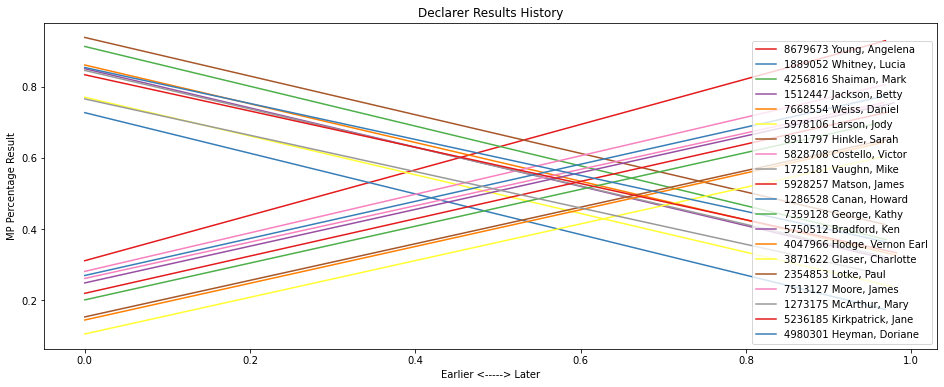

In [29]:
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only 9 colors
fig, ax = plt.subplots(figsize=(16,6))
ax.set(**declarer_history_d)
ax.set_prop_cycle(color=colors)
slopedf['abs_Slope'] = abs(slopedf['Slope'])
players = slopedf.nlargest(20,'abs_Slope')['Player']
for player in players:
    slope,xvalues,p = slope_x_p[player]
    plt.plot(xvalues, p(xvalues), label=player+' '+acbl_playerd[player])
plt.legend()

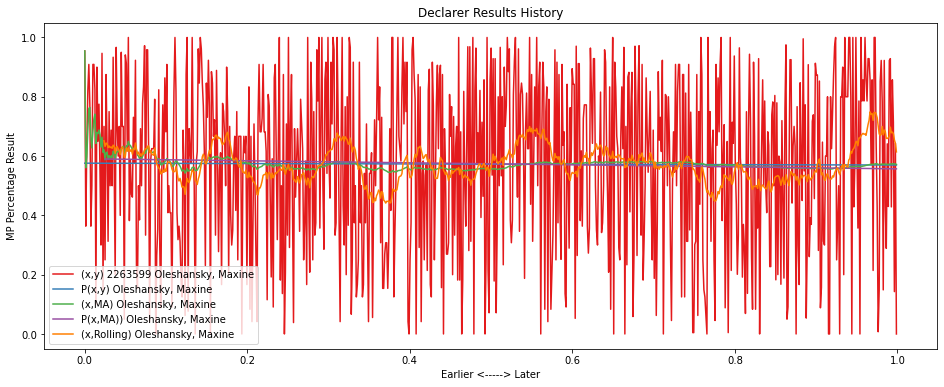

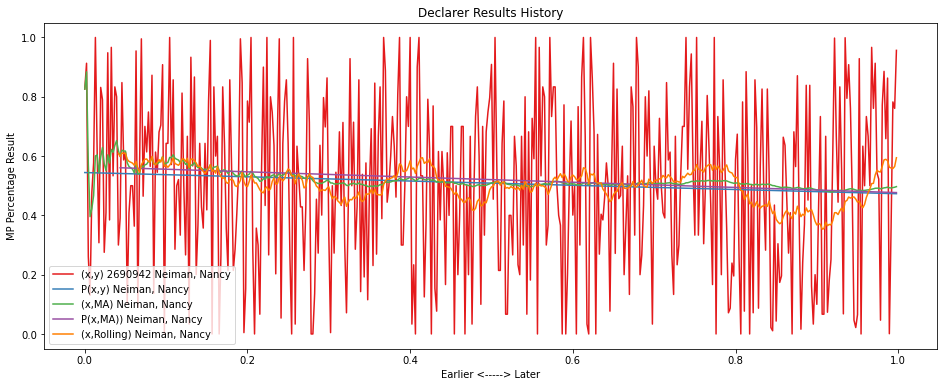

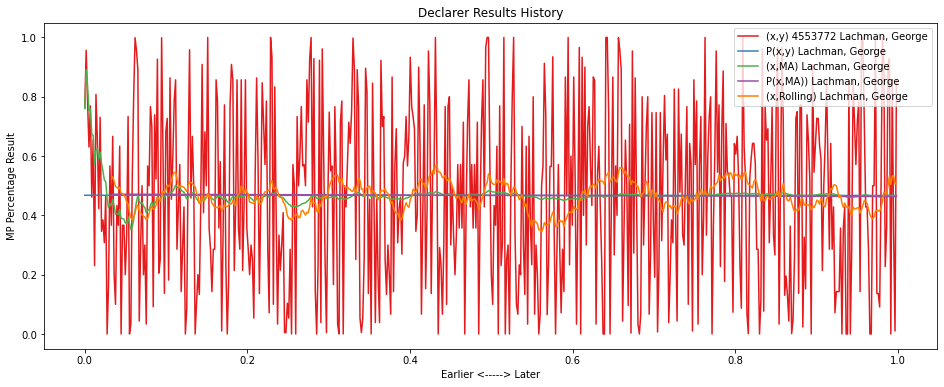

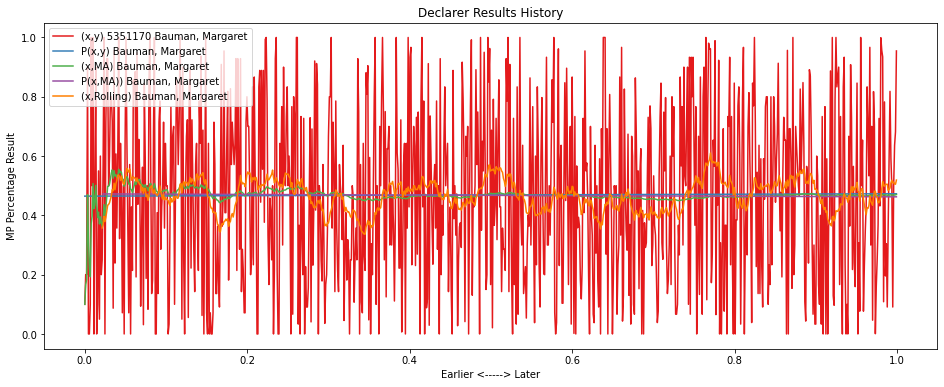

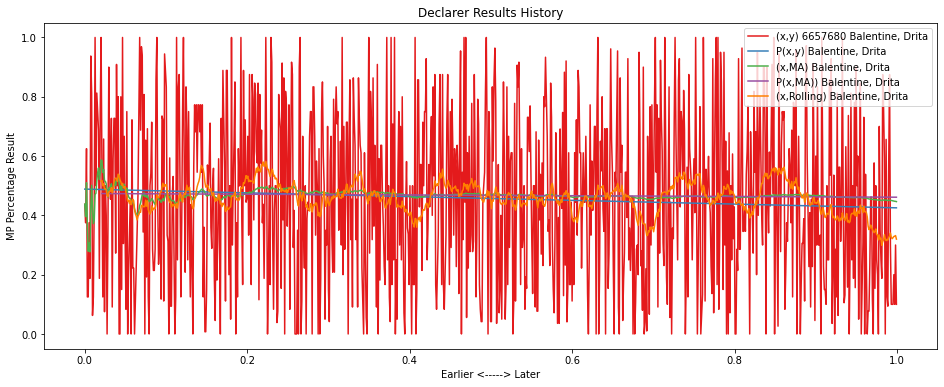

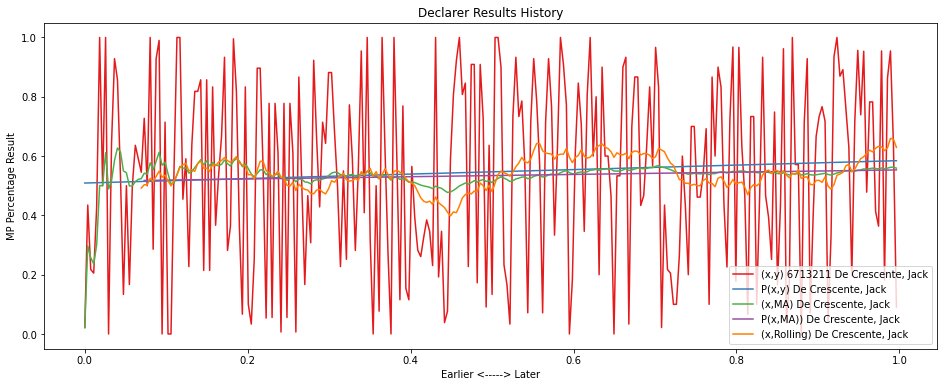

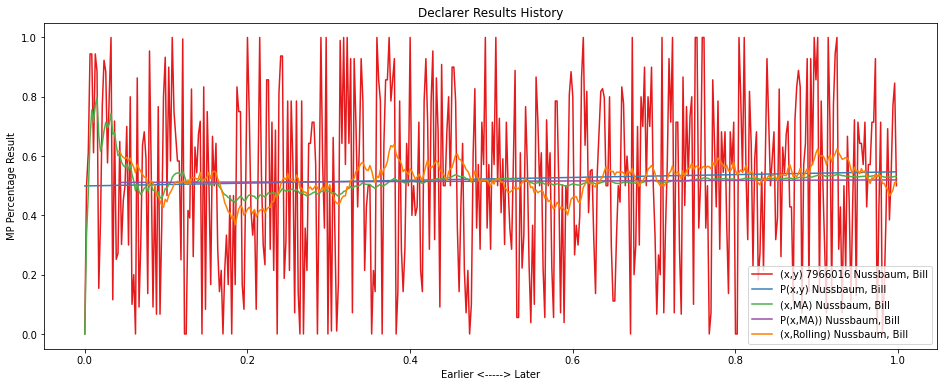

In [30]:
# show history of declarer results using trendlines. One player per plot.
import numpy as np
#players = ['1697013','1709925','2663279','8016437','6657680'] #,'2195097','2454602','2663279','2342200','8016437','8071683']
players = ['5351170','6657680','7966016','2690942','2263599','6713211','4553772']
mini_acbl_cgdf = acbl_cgdf[acbl_cgdf['Declarer'].isin(players)][['Declarer','Declarer_Pct']].groupby('Declarer')
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only  9 colors
for player,pdf in mini_acbl_cgdf:
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts
    fig, ax = plt.subplots(figsize=(16,6))
    ax.set(**declarer_history_d)
    ax.set_prop_cycle(color=colors)
    plt.plot(xvalues, yvalues, label='(x,y) '+player+' '+acbl_playerd[player])
    z = np.polyfit(xvalues, yvalues, 1) # z[0] is slope
    p = np.poly1d(z)
    plt.plot(xvalues, p(xvalues), label='P(x,y) '+acbl_playerd[player])
    w = [p/len(yvalues) for p in range(1,len(yvalues)+1)]
    moving_average = [sum(w[:n]*yvalues[:n])/sum(w[:n]) for n in range(1,len(yvalues)+1)]
    #print(len(xvalues[:len(moving_average)]),len(moving_average))
    plt.plot(xvalues, moving_average, label='(x,MA) '+acbl_playerd[player])
    z = np.polyfit(xvalues, moving_average, 1) # z[0] is slope
    p = np.poly1d(z)
    plt.plot(xvalues[20:], p(xvalues)[20:], label='P(x,MA)) '+acbl_playerd[player])
    rolling = yvalues.rolling(30,20)
    plt.plot(xvalues, rolling.mean(), label='(x,Rolling) '+acbl_playerd[player])
    #z = np.polyfit(xvalues, pcts.rolling(30,10).mean(), 1) # z[0] is slope
    #p = np.poly1d(z)
    #plt.plot(xvalues, p(xvalues), label='P(x,Rolling)) '+acbl_playerd[player])
    plt.legend()

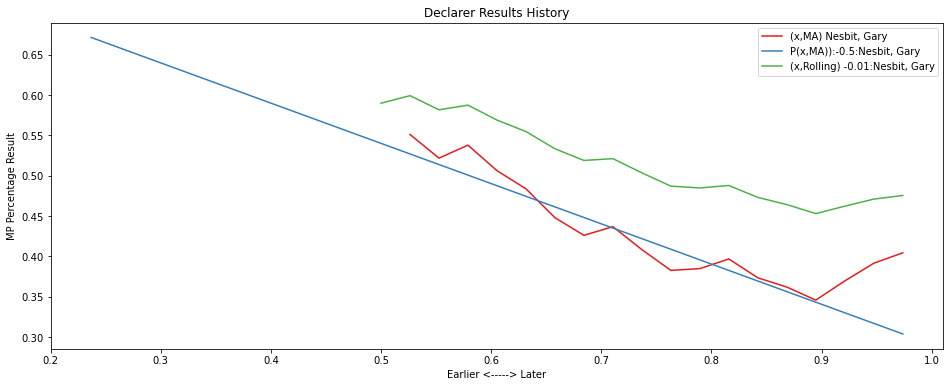

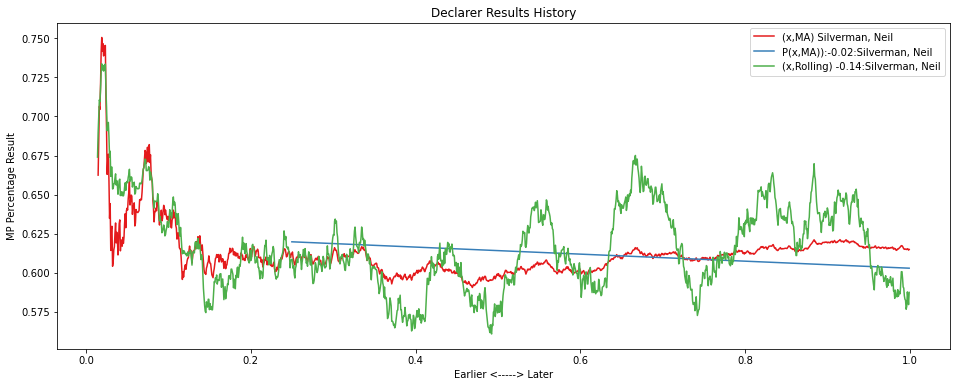

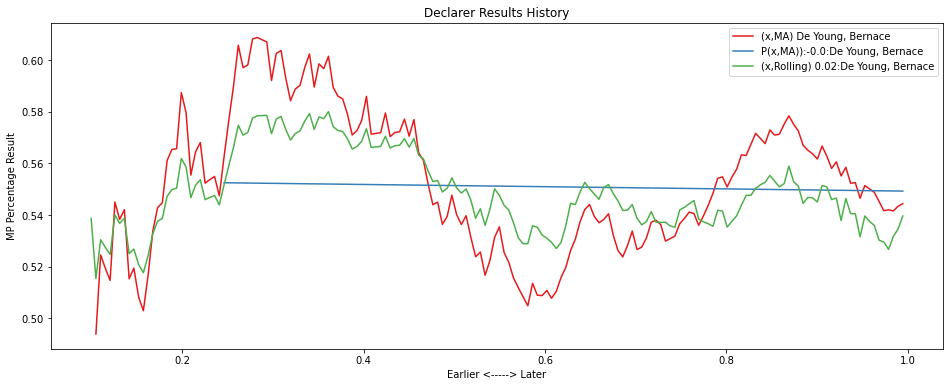

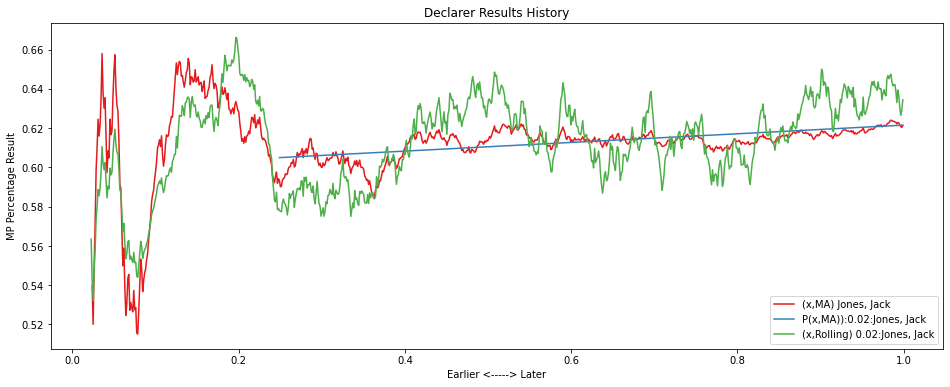

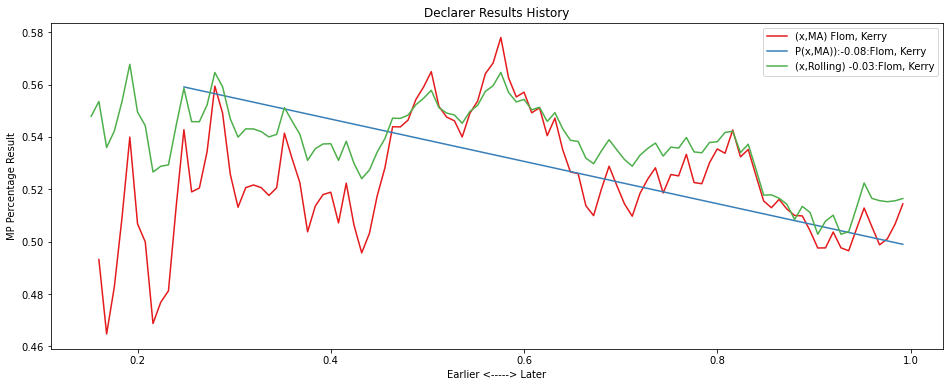

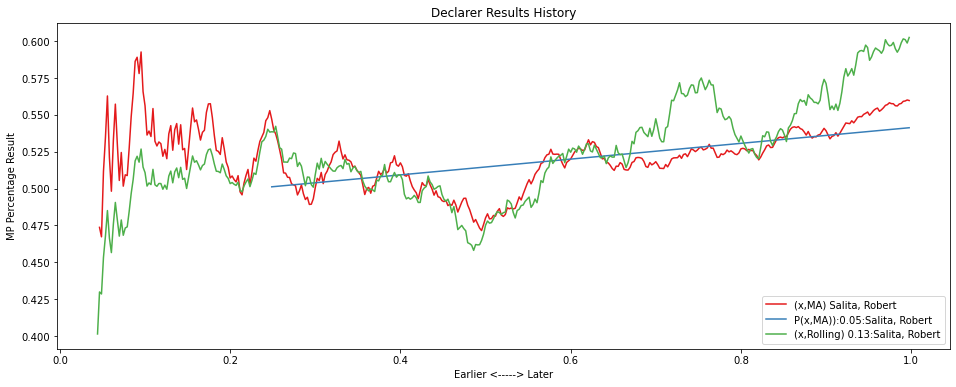

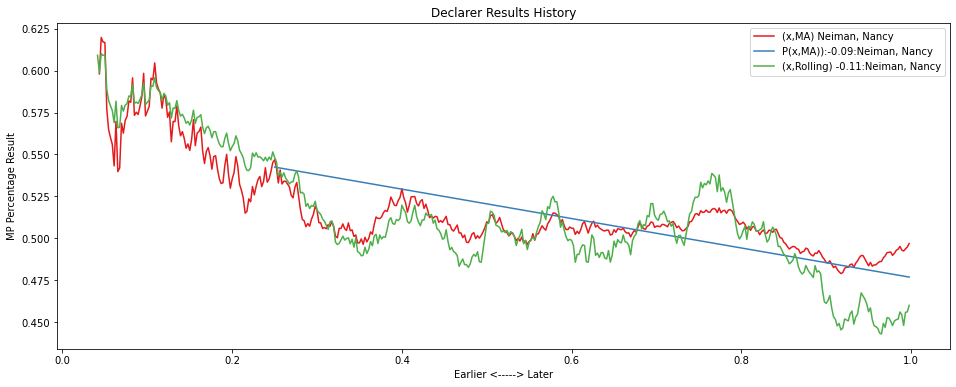

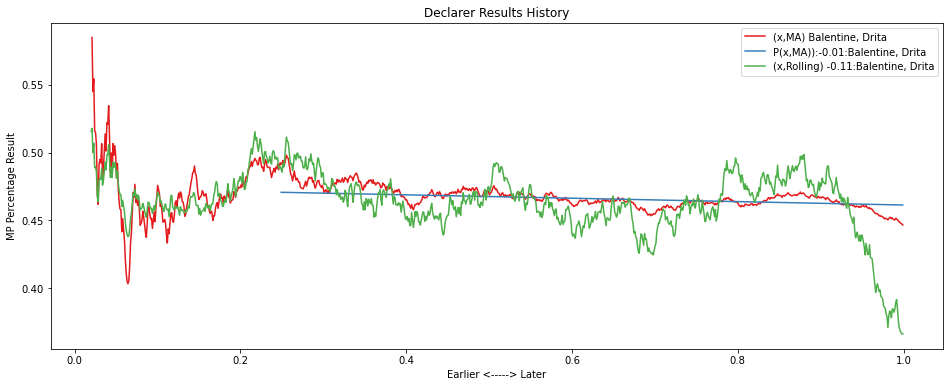

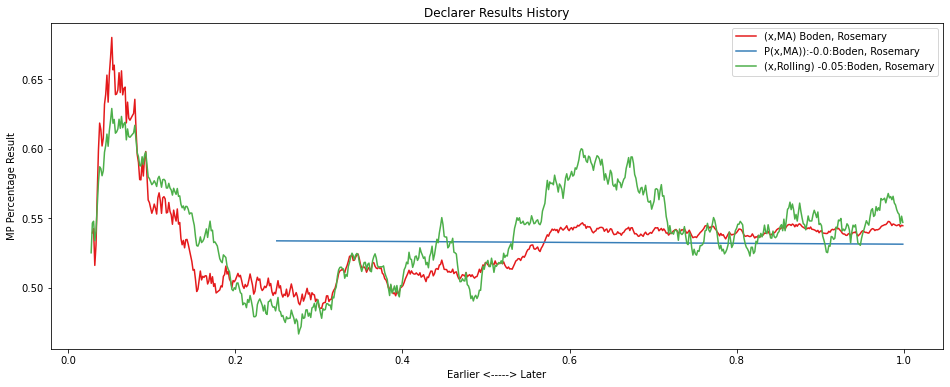

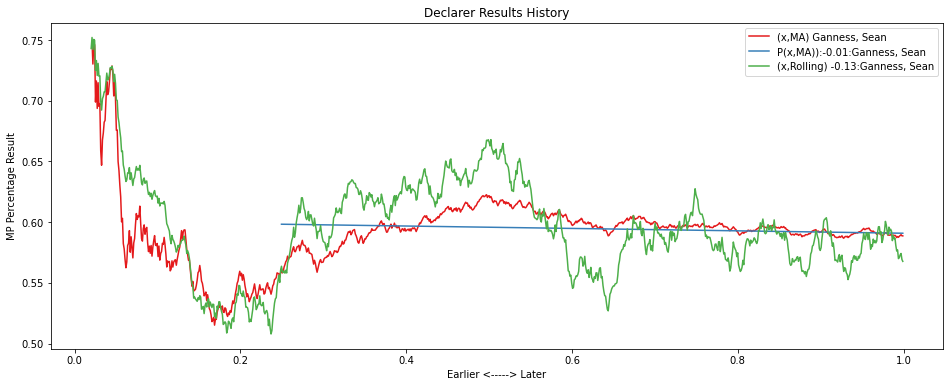

In [31]:
# show history of declarer results using trendlines. One player per plot.
# todo: looks like a better test for trends, instead of slope, is to look for higher highs and lower lows.
# slope may not be a good indicator as there are many factors effecting percentage such as online/partner/club/strata/bad-day.
import numpy as np
players = ['1697013','1709925','2663279','2195097','2454602','2663279','2342200','8016437','8071683','6657680','2690942']
mini_acbl_cgdf = acbl_cgdf[acbl_cgdf['Declarer'].isin(players)][['Declarer','Declarer_Pct']].groupby('Declarer')
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only  9 colors
for player,pdf in mini_acbl_cgdf:
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts
    w = [p/len(yvalues) for p in range(1,len(yvalues)+1)]
    moving_average = [sum(w[:n]*yvalues[:n])/sum(w[:n]) for n in range(1,len(yvalues)+1)]
    #print(len(xvalues[:len(moving_average)]),len(moving_average))
    fig, ax = plt.subplots(figsize=(16,6))
    ax.set(**declarer_history_d)
    ax.set_prop_cycle(color=colors)
    plt.plot(xvalues[20:], moving_average[20:], label='(x,MA) '+acbl_playerd[player])
    z = np.polyfit(xvalues, moving_average, 1) # z[0] is slope
    p = np.poly1d(z)
    l = int(len(yvalues)*.25) # experiment with ignoring 25% of beginning
    plt.plot(xvalues[l:], p(xvalues)[l:], label='P(x,MA)):'+str(round(z[0],2))+':'+acbl_playerd[player])
    rolling = yvalues.rolling(100,20).mean()
    #print(rolling.iloc[range(30,len(yvalues),50)],rolling.max())
    plt.plot(xvalues, rolling, label='(x,Rolling) '+str(round(rolling.iloc[-1]-rolling.iloc[30],2))+':'+acbl_playerd[player])
    #plt.plot(xvalues, rolling, label='(x,max) '+str(round(rolling.iloc[-1]-rolling.max(),2))+':'+acbl_playerd[player])
    #z = np.polyfit(xvalues, pcts.rolling(30,10).mean(), 1) # z[0] is slope
    #p = np.poly1d(z)
    #plt.plot(xvalues, p(xvalues), label='P(x,Rolling)) '+acbl_playerd[player])
    plt.legend()

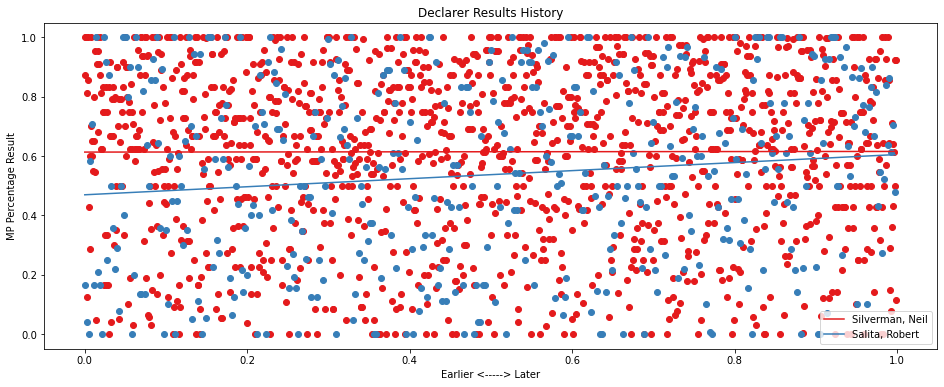

In [32]:
# show multiple player's history of declarer results.
# experiment with scatter plot and trendline.
players = ['1709925','2663279']
mini_acbl_cgdf = acbl_cgdf[acbl_cgdf['Declarer'].isin(players)][['Declarer','Declarer_Pct']].groupby('Declarer')
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only  9 colors
fig, ax = plt.subplots(figsize=(16,6))
ax.set(**declarer_history_d)
ax.set_prop_cycle(color=colors)
for player,pdf in mini_acbl_cgdf:
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts.values
    _ = ax.scatter(xvalues, yvalues)
    z = np.polyfit(xvalues, yvalues, 1)
    p = np.poly1d(z)
    plt.plot(xvalues, p(xvalues), label=acbl_playerd[player])
plt.legend()

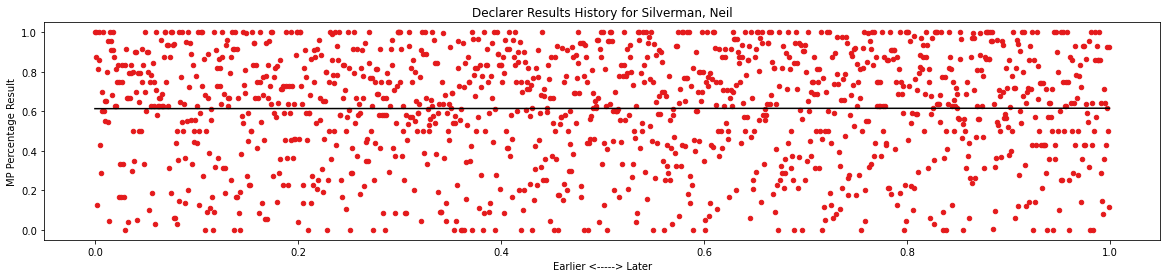

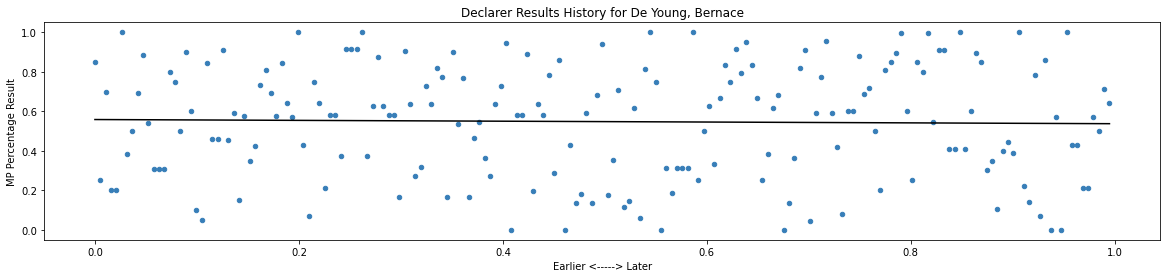

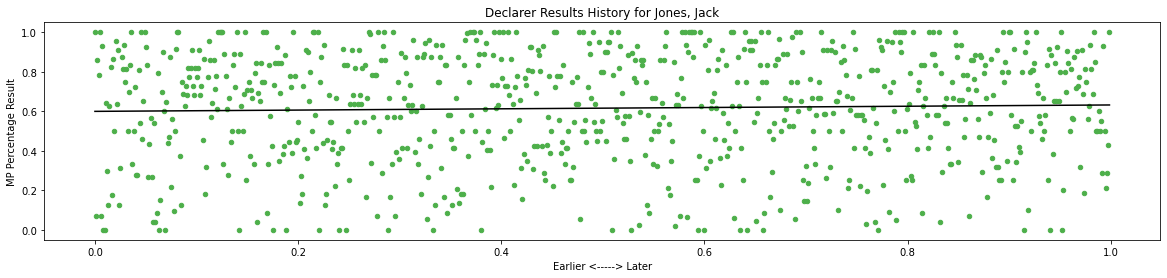

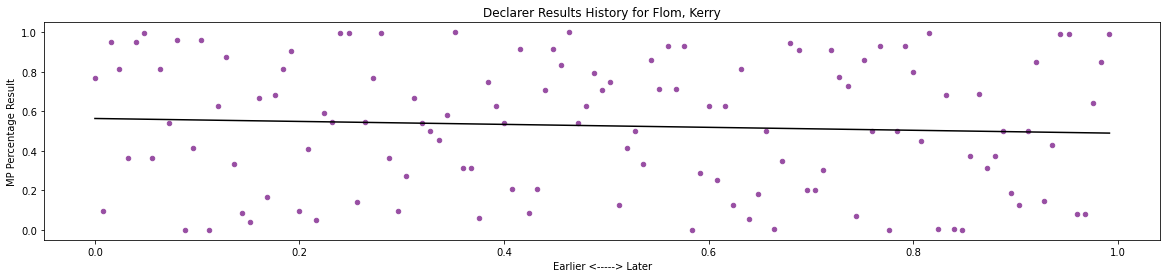

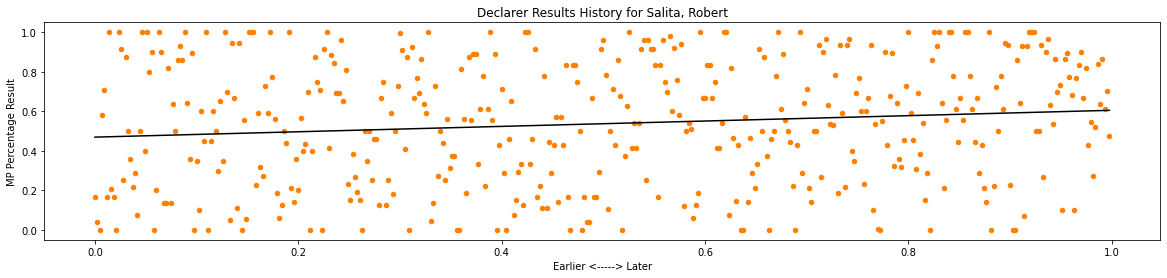

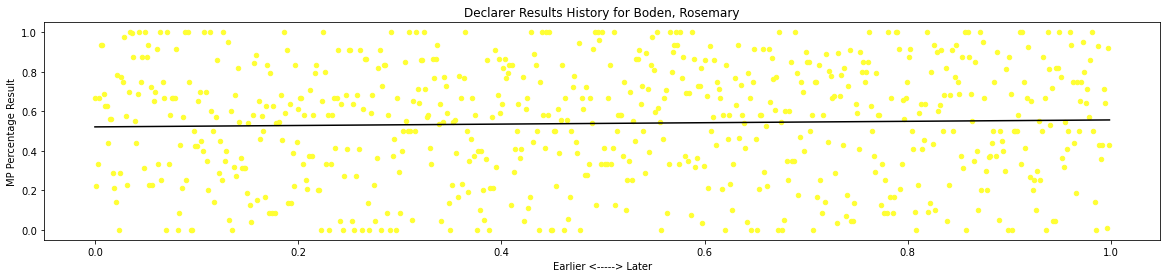

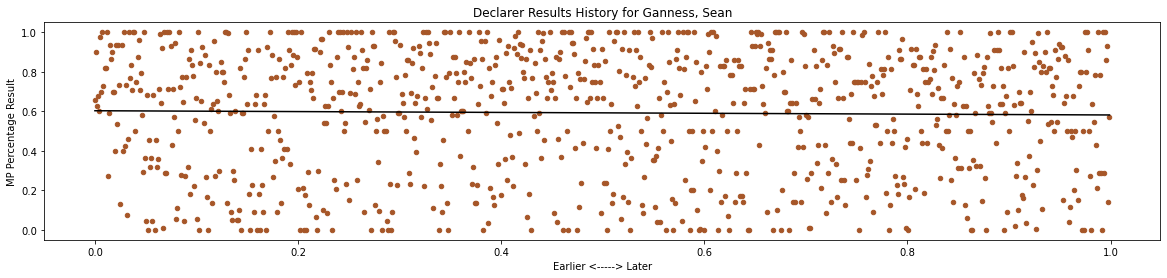

In [33]:
# show plots of each player's history of declarer results.
# experiment with scatter plot and trendline.
players = ['1709925','2663279','2195097','2454602','2663279','2342200','8016437','8071683']
mini_acbl_cgdf = acbl_cgdf[acbl_cgdf['Declarer'].isin(players)][['Declarer','Declarer_Pct']].groupby('Declarer')
colors = plt.cm.get_cmap('Set1').colors  # type: matplotlib.colors.ListedColormap. Set1 is good but only  9 colors
for color,(player,pdf) in zip(colors,mini_acbl_cgdf):
    pcts = pdf['Declarer_Pct']
    xvalues = [x/len(pcts) for x in range(len(pcts))]
    yvalues = pcts.values
    columns = ['Declarer_History','MP_Pct']
    plotdf = pd.DataFrame(zip(xvalues,yvalues),columns=columns)
    scatter = plotdf.plot(kind='scatter', color=color, x=columns[0], y=columns[1], figsize=(20,4))
    declarer_history_d['title'] = 'Declarer Results History for '+acbl_playerd[player] # caution: modifying title
    scatter.set(**declarer_history_d)
    #scatter.set(xlabel='Earlier <-----> Later', ylabel='MP Percentage Result', )
    z = np.polyfit(xvalues, yvalues, 1)
    p = np.poly1d(z)
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    scatter.plot(xvalues, p(xvalues),'k-', label=acbl_playerd[player])

<AxesSubplot:>

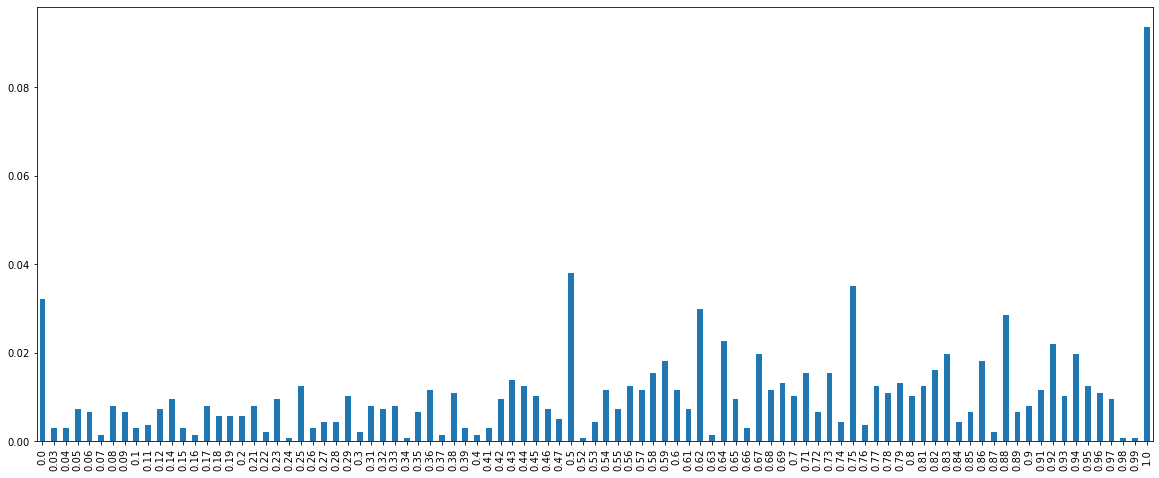

In [34]:
# takes 5s
# warning: Need to do astype('float') before round() otherwise round() will have no effect.
s = g.get_group('1709925')['Declarer_Pct'].astype('float').round(2).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(20,8))
s

<AxesSubplot:>

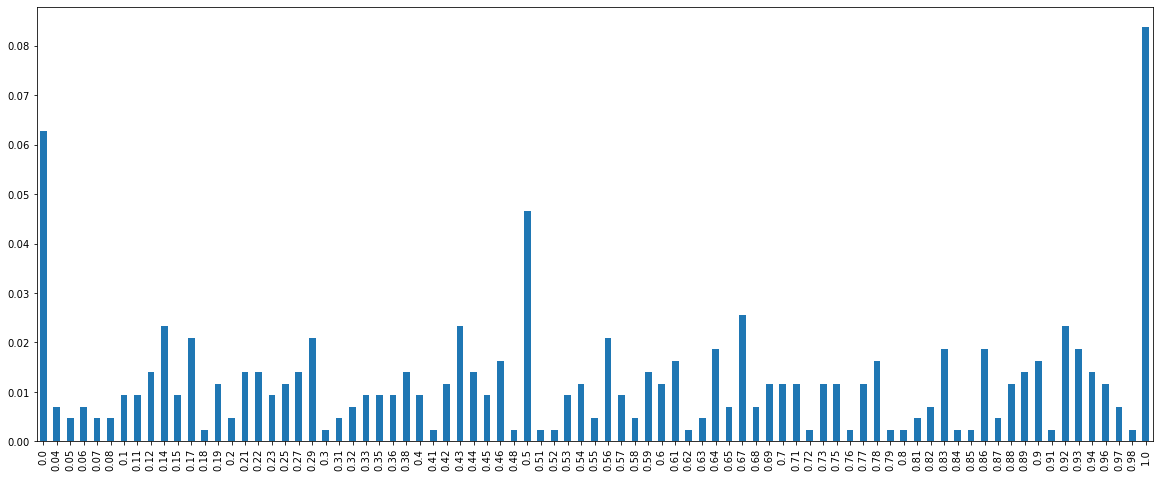

In [35]:
# takes 2s
# warning: Need to do astype('float') before round() otherwise round() will have no effect.
s = g.get_group('2663279')['Declarer_Pct'].astype('float').round(2).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(20,8))
s

<AxesSubplot:>

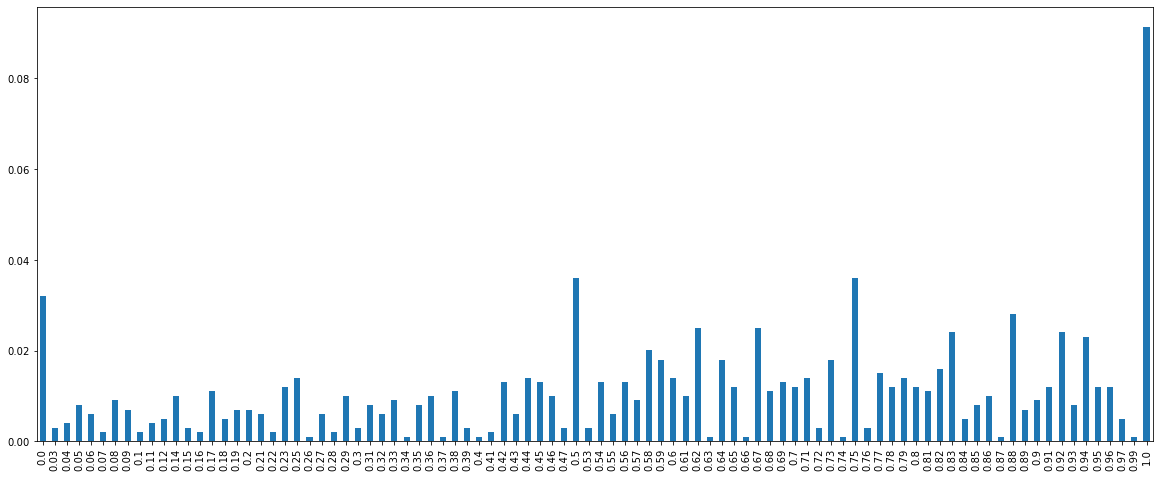

In [36]:
# takes 2s
# warning: Need to do astype('float') before round() otherwise round() will have no effect.
s = g.get_group('1709925')[g.get_group('1709925')['Club'] == '108571']['Declarer_Pct'].astype('float').round(2).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(20,8))
s

In [37]:
# takes 2s
# Get player numbers from name. Requires exact name for lookup
name_lookups = ['Salita, Robert', 'Silverman, Neil', 'Ganness, Sean']
number_names = [(k,acbl_playerd[k]) for k in g.groups.keys() if acbl_playerd[k] in name_lookups]
number_names

[('1709925', 'Silverman, Neil'),
 ('2663279', 'Salita, Robert'),
 ('8071683', 'Ganness, Sean')]

<AxesSubplot:>

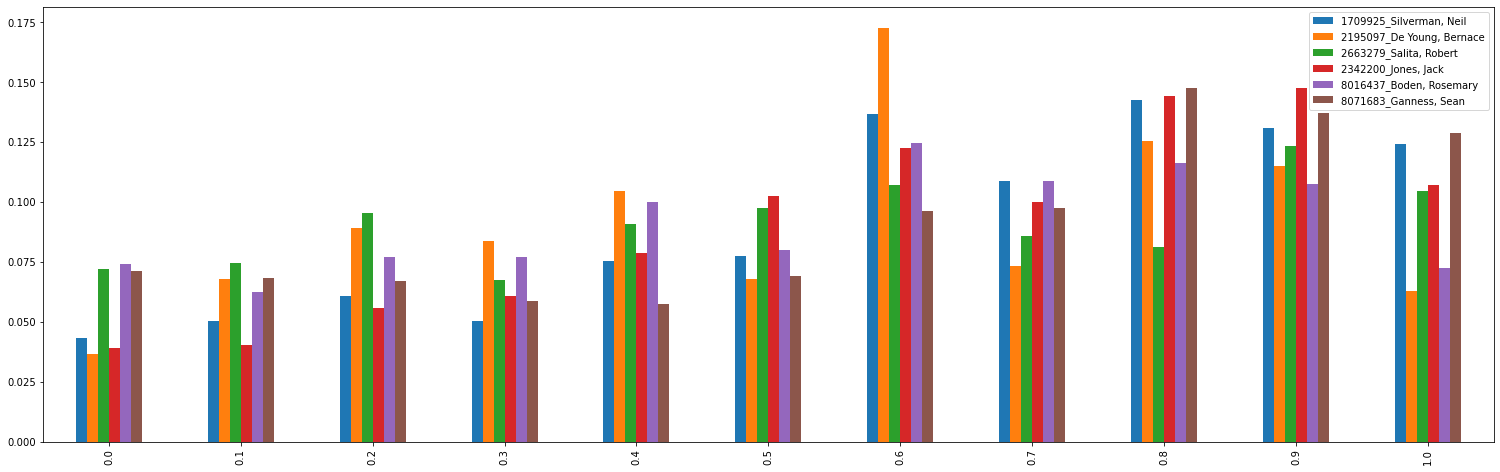

In [38]:
# takes 1s
# Compare two player's Declarer_Pct
plotd = {}
# Kerry Flom '2454602' disappeared. Must have been dropped.
players = ['1709925','2195097','2663279','2342200','8016437','8071683']
for p in players:
    pg = g.get_group(p)
    n = p+'_'+acbl_playerd[p]
    # warning: Need to do astype('float') before round() otherwise round() will have no effect.
    plotd[n] = pg['Declarer_Pct'].astype('float').round(1).value_counts(normalize=True).sort_index()
s = pd.DataFrame(plotd).plot(kind='bar',figsize=(26,8))
s

In [39]:
g.get_group('2663279')

,Club,Declarer,Pct,Declarer_Pct,NSEW,Score,Declarer_Score,Declarer_Par,Declarer_MP,Dummy_MP,Geometric_MP
2011189,108571,2663279,0.83,0.17,E,-90,90,-400,157.19,2755.32,433108.75
2011197,108571,2663279,0.96,0.04,E,500,-500,400,157.19,2755.32,433108.75
2011198,108571,2663279,1.00,0.00,E,200,-200,140,157.19,2755.32,433108.75
2011199,108571,2663279,0.42,0.58,E,-620,620,-140,157.19,2755.32,433108.75
2011203,108571,2663279,0.29,0.71,E,-140,140,620,157.19,2755.32,433108.75
2011206,108571,2663279,0.83,0.17,E,50,-50,300,157.19,2755.32,433108.75
2011207,108571,2663279,0.00,1.00,E,-520,520,100,157.19,2755.32,433108.75
2011208,108571,2663279,0.79,0.21,E,-600,600,-450,157.19,2755.32,433108.75
2011209,108571,2663279,0.83,0.17,E,-110,110,1440,157.19,2755.32,433108.75
2011211,108571,2663279,1.00,0.00,E,150,-150,90,157.19,2755.32,433108.75


In [40]:
# takes 40s
# todo: switch this back to single line? switch to defaultdict(list)? Redo collecting indexes instead of lists of values.
# todo: more 'Declarer_PctAvg' and 'Declarer_Name' to acbl-board-results-cleanup?
dealers = []
names = []
par = []
parbeats = []
pctavg = []
mps = []
geomp = []
count = []

for k,gg in g:
    #if k != '2663279':
    #    continue
    if k.isnumeric() and len(gg) > 30:
        # make boolean list for whether player's score beats or equals par.
        pb = [int(score) >= par if nsew in 'NS' else int(score) <= par for nsew,score,par in zip(gg['NSEW'],gg['Score'],gg['Declarer_Par'])]
        if len(pb) > 30: # want 30+ boards to determine par beat score.[score[0] == '-':]
            dealers.append(k)
            names.append(acbl_playerd[k]) # Note Declarer_Name can change through lifetime. Use last instance?
            parbeats.append(sum(pb)/len(pb))
            pctavg.append(gg['Declarer_Pct'].mean())
            geomp.append((gg['Declarer_MP']*gg['Dummy_MP']).mean())
            mps.append(gg.iloc[-1]['Declarer_MP'].max())
            count.append(len(gg))
ggdf = pd.DataFrame({'Dealer':dealers,'Name':names,'Par_Beats':parbeats,'Declarer_PctAvg':pctavg,'Declarer_MP':mps,'Geometric_MP':geomp,'Count':count})
ggdf['Par_Beats_PctAvg'] = ggdf['Par_Beats']*ggdf['Declarer_PctAvg']
ggdf

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
0,1000365,"Fearen, Diane",0.68,0.45,97.99,24857.17,184,0.31
1,1000489,"Lubich, Dan",0.58,0.47,111.26,129243.32,310,0.27
2,1000543,"Jackson, Newt",0.68,0.57,199.93,29868.01,411,0.39
3,1000810,"Woeste, John",0.52,0.46,871.07,1495232.65,56,0.24
4,1000837,"Nitta, Ken",0.68,0.39,21.13,251.98,37,0.26
5,1000969,"Erbil, Guher",0.68,0.47,177.33,254541.44,56,0.32
6,1001175,"Delahan, Franz",0.60,0.47,917.61,807426.61,88,0.28
7,1001426,"Reynders, Ludo",0.62,0.42,25.72,2902.35,47,0.26
8,1001477,"Brown, Charlie",0.62,0.50,3389.15,14447024.80,181,0.31
9,1001515,"Stanczyk, Gerri",0.56,0.49,134.11,16868.35,99,0.27


In [41]:
ggdf.sort_values('Declarer_PctAvg',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
44380,7555938,"Wolf, Peg",0.72,0.76,210.16,128976.64,39,0.54
50121,8429286,"Martel, P",0.64,0.74,1403.62,1318775.79,50,0.47
20059,3935159,"Roseberry, Dan",0.63,0.73,9217.21,79994220.30,41,0.46
45150,7657072,"Johann, Robert",0.72,0.73,573.42,123275.73,64,0.52
35319,6088643,"Jackson, Steve",0.62,0.73,1525.31,5192152.55,52,0.45
19676,3886492,"Maclin, Bruce",0.68,0.72,4328.58,28496090.75,71,0.49
14632,3154890,"Larocque, Jean",0.65,0.72,461.17,305327.97,31,0.47
7275,2100924,"Mowat, Al",0.88,0.72,4832.72,11462997.78,33,0.63
43509,7426003,"Bout, Andrew",0.84,0.72,8.59,1274.52,37,0.60
6307,1980998,"Skurcenski, Gerald",0.72,0.71,9.90,604.12,47,0.52


In [42]:
ggdf[ggdf['Dealer'] == '1709925'].sort_values('Declarer_PctAvg',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
4655,1709925,"Silverman, Neil",0.67,0.61,11372.30,43321994.63,1369,0.41


In [43]:
ggdf[ggdf['Dealer'] == '2663279'].sort_values('Declarer_PctAvg',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
11343,2663279,"Salita, Robert",0.68,0.54,231.55,307066.39,430,0.37


In [44]:
ggdf.sort_values('Par_Beats',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
54420,9103988,"Stough, Darr",0.94,0.58,174.79,112732.39,36,0.55
11441,2672189,"Cook, Susan",0.94,0.54,38.55,22787.52,34,0.51
24877,4674715,"Michelstein, Richard",0.92,0.59,649.62,120204.87,37,0.55
16833,3463966,"Marquette, Julie",0.91,0.63,653.95,531423.33,33,0.57
48688,8189668,"Leser, Cornelia",0.91,0.44,390.13,124358.79,32,0.40
25957,4860527,"Weaver, Sandra",0.89,0.53,453.07,239637.48,35,0.47
10214,2534339,"Grenier, Peter",0.89,0.64,1532.81,6506282.75,35,0.57
45614,7709692,"Hoffmockel, Sally",0.89,0.51,10.54,216.76,35,0.45
47465,7972377,"Caesar, Eleanor",0.88,0.53,0.29,0.54,34,0.47
2684,1421158,"Sheftick, Pat",0.88,0.55,39.36,651.75,33,0.48


In [45]:
players = ['5966329','1709925','2195097','2454602','2663279','2342200','8016437','8071683','4897560','6529224','6672000','1320998']
players += ['2216833','8691576','3565408','8744475','8471908','4036956','3486443','4541995','5922984','4460359','4606868','5511054']
ggdf[ggdf['Dealer'].isin(players)].sort_values('Par_Beats',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
37132,6529224,"Pollack, Frederic",0.79,0.62,14592.69,45197154.59,77,0.49
37696,6672000,"Silverstein, Aaron",0.70,0.64,21706.64,101540852.23,260,0.45
17384,3565408,"Pavlicek, Richard",0.70,0.60,18611.12,94914951.43,135,0.42
20735,4036956,"Shenkin, Barnet",0.69,0.60,6209.14,35091226.31,465,0.42
51961,8744475,"Castillo, Juan",0.68,0.60,5657.39,18425424.75,446,0.41
11343,2663279,"Salita, Robert",0.68,0.54,231.55,307066.39,430,0.37
23299,4460359,"Phillips, Joe",0.68,0.56,5383.40,19039517.02,621,0.38
34376,5966329,"Parrish, Adam",0.68,0.56,4600.18,2447286.06,387,0.38
33823,5922984,"O'Neill, Molly",0.67,0.55,4725.19,27884717.69,406,0.37
8241,2216833,"Seamon-Molson, Janice",0.67,0.62,20995.09,62176194.79,390,0.42


In [46]:
ggdf[ggdf['Dealer'].isin(players)].sort_values('Par_Beats',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
37132,6529224,"Pollack, Frederic",0.79,0.62,14592.69,45197154.59,77,0.49
37696,6672000,"Silverstein, Aaron",0.70,0.64,21706.64,101540852.23,260,0.45
17384,3565408,"Pavlicek, Richard",0.70,0.60,18611.12,94914951.43,135,0.42
20735,4036956,"Shenkin, Barnet",0.69,0.60,6209.14,35091226.31,465,0.42
51961,8744475,"Castillo, Juan",0.68,0.60,5657.39,18425424.75,446,0.41
11343,2663279,"Salita, Robert",0.68,0.54,231.55,307066.39,430,0.37
23299,4460359,"Phillips, Joe",0.68,0.56,5383.40,19039517.02,621,0.38
34376,5966329,"Parrish, Adam",0.68,0.56,4600.18,2447286.06,387,0.38
33823,5922984,"O'Neill, Molly",0.67,0.55,4725.19,27884717.69,406,0.37
8241,2216833,"Seamon-Molson, Janice",0.67,0.62,20995.09,62176194.79,390,0.42


In [47]:
ggdf[ggdf['Count']>=100].sort_values('Par_Beats',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
59362,9654682,"Lapins, Gail",0.82,0.63,3631.52,10026789.60,106,0.52
33745,5910625,"Hillaker, Hugh",0.81,0.65,16977.79,129333156.13,175,0.53
43536,7429681,"O'Banion, Sibyl",0.81,0.56,3033.38,9353874.89,116,0.46
17951,3634582,"Sedgwick, John",0.81,0.59,3469.35,10380205.29,119,0.47
30460,5461022,"Craig, Robert",0.80,0.65,8076.68,89329378.68,186,0.52
32053,5666384,"Lewis, Marie",0.80,0.59,330.50,692455.68,120,0.47
24138,4559991,"Billheimer, Jeffrey",0.80,0.62,1500.40,2678080.44,103,0.49
29718,5377935,"Wells, Janris",0.79,0.52,1411.81,3554255.42,120,0.41
8836,2311011,"Brown, Karen",0.79,0.59,1833.37,3023235.34,230,0.47
30775,5490057,"Bergera, Anne",0.79,0.57,242.99,10993.19,123,0.45


In [48]:
ggdf.nlargest(100,'Count').sort_values('Par_Beats_PctAvg',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
33053,5818389,"Boyle, Brad",0.68,0.63,2804.48,14530879.11,1168,0.43
33721,5907438,"Anderson, Alice",0.67,0.63,11773.62,95609367.98,2194,0.43
3389,1526189,"Lewis, Robert",0.66,0.63,4943.18,13633810.28,1276,0.42
36357,6311830,"Day, Wilson",0.69,0.60,6544.32,29904988.44,1019,0.42
4655,1709925,"Silverman, Neil",0.67,0.61,11372.30,43321994.63,1369,0.41
26848,5021456,"Anderson, Bill",0.66,0.61,11370.71,98491377.41,2202,0.41
33148,5835054,"Walter, Lew",0.69,0.58,7616.35,62506303.98,961,0.40
49091,8258333,"Himes, Pam",0.70,0.57,5221.89,20448994.01,949,0.40
6579,2010216,"Goldman, Alan",0.69,0.58,7962.33,29562609.60,1070,0.40
51254,8625751,"Hudson, Dave",0.67,0.58,6770.05,22072457.70,1011,0.39


In [49]:
ggdf[ggdf['Par_Beats'].ge(.65) & ggdf['Count'].ge(100) & ggdf['Declarer_PctAvg'].ge(.54)].sort_values('Geometric_MP',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
3908,1613707,"Stout, Alan",0.73,0.60,35826.59,406578142.74,122,0.44
13075,2943239,"McLaughlin, Mark",0.71,0.56,19757.78,391249503.67,136,0.40
34637,5989906,"Brady, John",0.65,0.61,16380.75,318984099.35,141,0.40
49583,8340773,"Daling, Janet",0.68,0.63,25576.19,306844441.43,340,0.43
49132,8263752,"Mansfield, Steve",0.72,0.63,14244.21,305710893.60,358,0.45
30724,5485398,"Goldstein, Rick",0.65,0.62,17099.79,275117469.36,240,0.40
22454,4321421,"Tucker, Melanie",0.67,0.58,20292.93,270033425.43,790,0.39
692,1146475,"Swanson, John",0.66,0.57,16063.55,269570412.11,103,0.38
693,1146483,"Swanson, Selena",0.67,0.57,16840.13,269516244.40,116,0.38
13806,3053709,"Brill, Laura",0.71,0.59,16399.86,263907612.29,245,0.42


In [50]:
ggdf[ggdf['Count'].ge(1200)].sort_values('Geometric_MP',ascending=False)

,Dealer,Name,Par_Beats,Declarer_PctAvg,Declarer_MP,Geometric_MP,Count,Par_Beats_PctAvg
26848,5021456,"Anderson, Bill",0.66,0.61,11370.71,98491377.41,2202,0.41
33721,5907438,"Anderson, Alice",0.67,0.63,11773.62,95609367.98,2194,0.43
13467,2997630,"Ionis-Sorren, Bella",0.65,0.58,12658.19,67337935.54,1546,0.38
4655,1709925,"Silverman, Neil",0.67,0.61,11372.30,43321994.63,1369,0.41
17214,3551113,"Willenborg, Irma",0.68,0.53,9177.55,42433429.80,1279,0.36
1906,1310577,"O'Rourke, Michael",0.66,0.57,2494.96,14626111.10,1498,0.37
3389,1526189,"Lewis, Robert",0.66,0.63,4943.18,13633810.28,1276,0.42
16978,3500470,"Petrey, Gene",0.64,0.50,3847.17,9714777.17,1239,0.32
24246,4574885,"Wagner Jr, Kenneth",0.61,0.51,3984.85,6016347.21,1774,0.31
3391,1527622,"Webster, Shirleyanne",0.64,0.53,2945.60,2861544.00,2071,0.34


In [52]:
ggdf.to_excel(acblPath.joinpath('ggdf.xlsx'))